In [1]:
import cv2
import imutils
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from glob import glob

from PIL import Image
import os


%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({
    # math
    "mathtext.fontset" : "cm",
    "font.family": "sans-serif"
})

%config InlineBackend.figure_format = 'svg'

### Read data from drone pics (for individual plot)

### Plot data original and mask

In [74]:
# Image path
mask_path = "../data/dataset/semantic_drone_dataset/new_data/masks"
orig_path = "../data/dataset/semantic_drone_dataset/new_data/images"

# Image name
mask_name = "000_0.png"
orig_name = "000_0.jpg"

mask = os.path.join(mask_path,mask_name)
orig = os.path.join(orig_path,orig_name)

mask_x = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
orig_y = plt.imread(orig)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
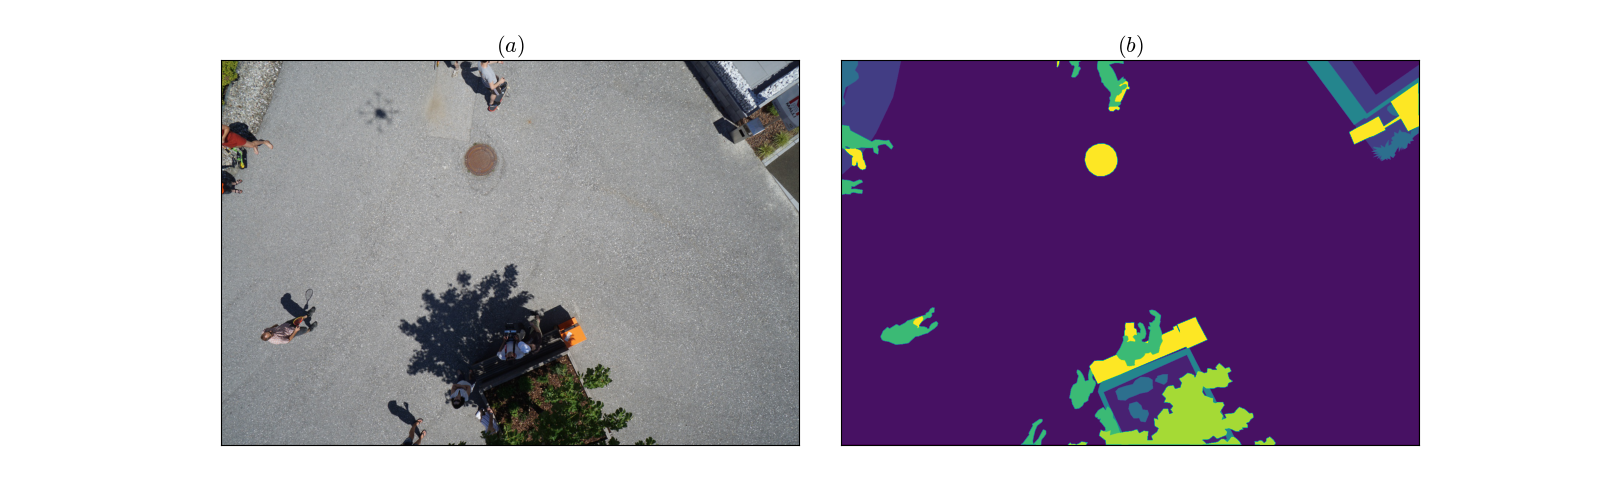

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
orig = ax[0].imshow(orig_y)
pred = ax[1].imshow(mask_x)

titlefont = 16
ax[0].set_title("$(a)$", size=titlefont)
ax[1].set_title("$(b)$", size=titlefont)

ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0)

### Colorbar labels

In [13]:
H = 320
W = 480

y = cv2.resize(y, (W, H))
y1 = cv2.resize(y1, (W, H))
y2 = cv2.resize(y2, (W, H))


In [4]:

labels = ["$paved-area$",
        "$dirt$",
        "$grass$",
        "$gravel$",
        "$water$",
        "$rocks$",
        "$pool$",
        "$vegetation$",
        "$roof$",
        "$wall$",
        "$window$",
        "$door$",
        "$fence$",
        "$fence-pole$",
        "$person$",
        "$dog$",
        "$car$",
        "$bicycle$",
        "$tree$",
        "$bald-tree$",
        "$ar-marker$",
        "$obstacle$",
        "$conflicting$",
]
div = 255 / len(labels)
thresh = [(1 + div*i, (i + 1)*div) for i in range(len(labels))]

### Plot drone pics (individual)

In [87]:
# Image path
pred_path = "../data/drone_vids/clip1/img/pred"
actual_path = "../data/drone_vids/clip1/img/orig"

#pred_path = "../data/drone_vids/shade_exp/car/evening/img/pred"
#actual_path = "../data/drone_vids/shade_exp/car/evening/img/orig"

# Image name
# num = "161" # Good prediction
# num = "0" # Poor performance bad lighting
num = "757" # Tire markings
pred_name = f"{num}.png"
actual_name = f"original_{num}.png"

img = os.path.join(pred_path,pred_name)
act = os.path.join(actual_path,actual_name)

x = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
y = plt.imread(act)


if x is None or y is None:
    raise Exception("No image has been read! Check your path name.")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
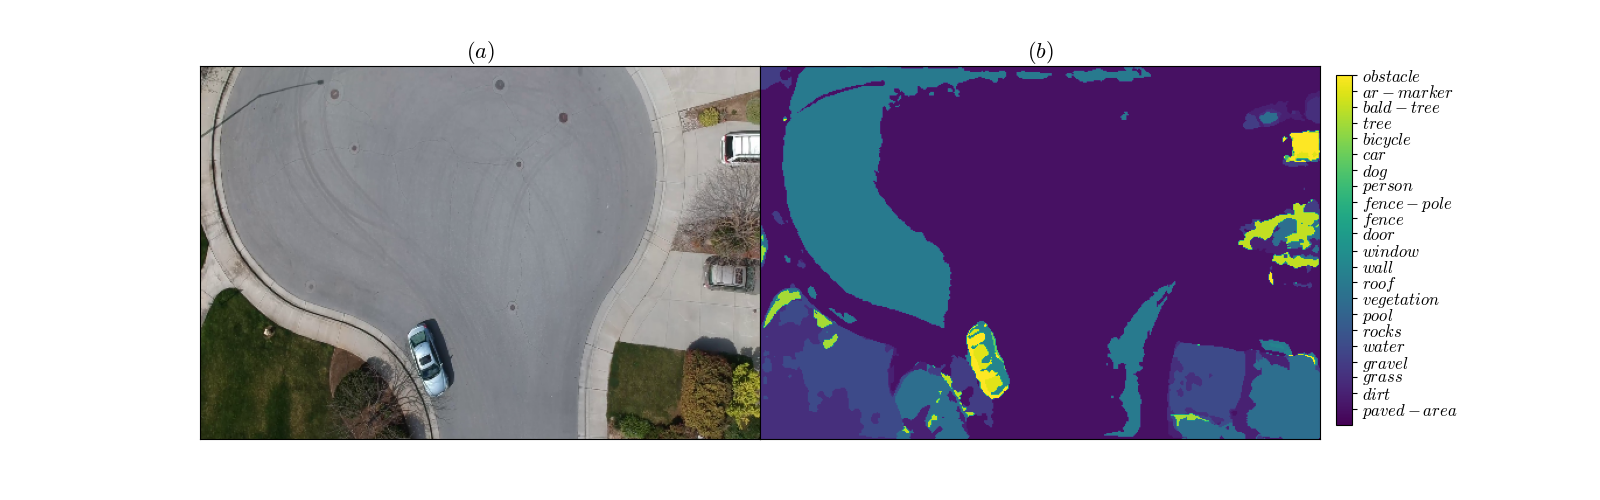

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
orig = ax[0].imshow(y)
pred = ax[1].imshow(x)

titlefont = 16
ax[0].set_title("$(a)$", size=titlefont)
ax[1].set_title("$(b)$", size=titlefont)

ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0, wspace=0)
fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.835, 0.15, 0.01, 0.7])
cbar=fig.colorbar(pred, cax=cbar_ax, ticks = [int(thresh[i][1]) for i in range(0, len(thresh), 1)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), 1)])

tick_font_size = 12
cbar.ax.tick_params(labelsize=tick_font_size)

### Compare drone roofs with dataset

In [74]:
# Dataset
# Image path
pred_path2 = "../results" 
actual_path2 = "../data/dataset/semantic_drone_dataset/new_data/images"

# Image name
pred_name2 = "145.png"
actual_name2 = "145_0.jpg"

pred2 = os.path.join(pred_path2,pred_name2)
act2 = os.path.join(actual_path2,actual_name2)

x = cv2.imread(pred2, cv2.IMREAD_GRAYSCALE)
y = plt.imread(act2)


if x is None:
    raise Exception("x2 has not been read! Check your path name.")

if y is None:
    raise Exception("y2 has not been read! Check your path name.")

In [75]:
# Roofs one (not detected)
# Image path
pred_path = "../data/drone_vids/clip3/img/pred"
actual_path = "../data/drone_vids/clip3/img/orig"

# Image name
num = "113"
pred_name = f"{num}.png"
actual_name = f"original_{num}.png"

img = os.path.join(pred_path,pred_name)
act = os.path.join(actual_path,actual_name)

x1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
y1 = plt.imread(act)


if x1 is None or y1 is None:
    raise Exception("No image has been read! Check your path name.")

In [76]:
# Roofs two (detected)
pred_path = "../data/drone_vids/clip1/img/pred"
actual_path = "../data/drone_vids/clip1/img/orig"

# Image name
num = "5"
pred_name = f"{num}.png"
actual_name = f"original_{num}.png"

img = os.path.join(pred_path,pred_name)
act = os.path.join(actual_path,actual_name)

x2 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
y2 = plt.imread(act)


if x2 is None or y2 is None:
    raise Exception("No image has been read! Check your path name.")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
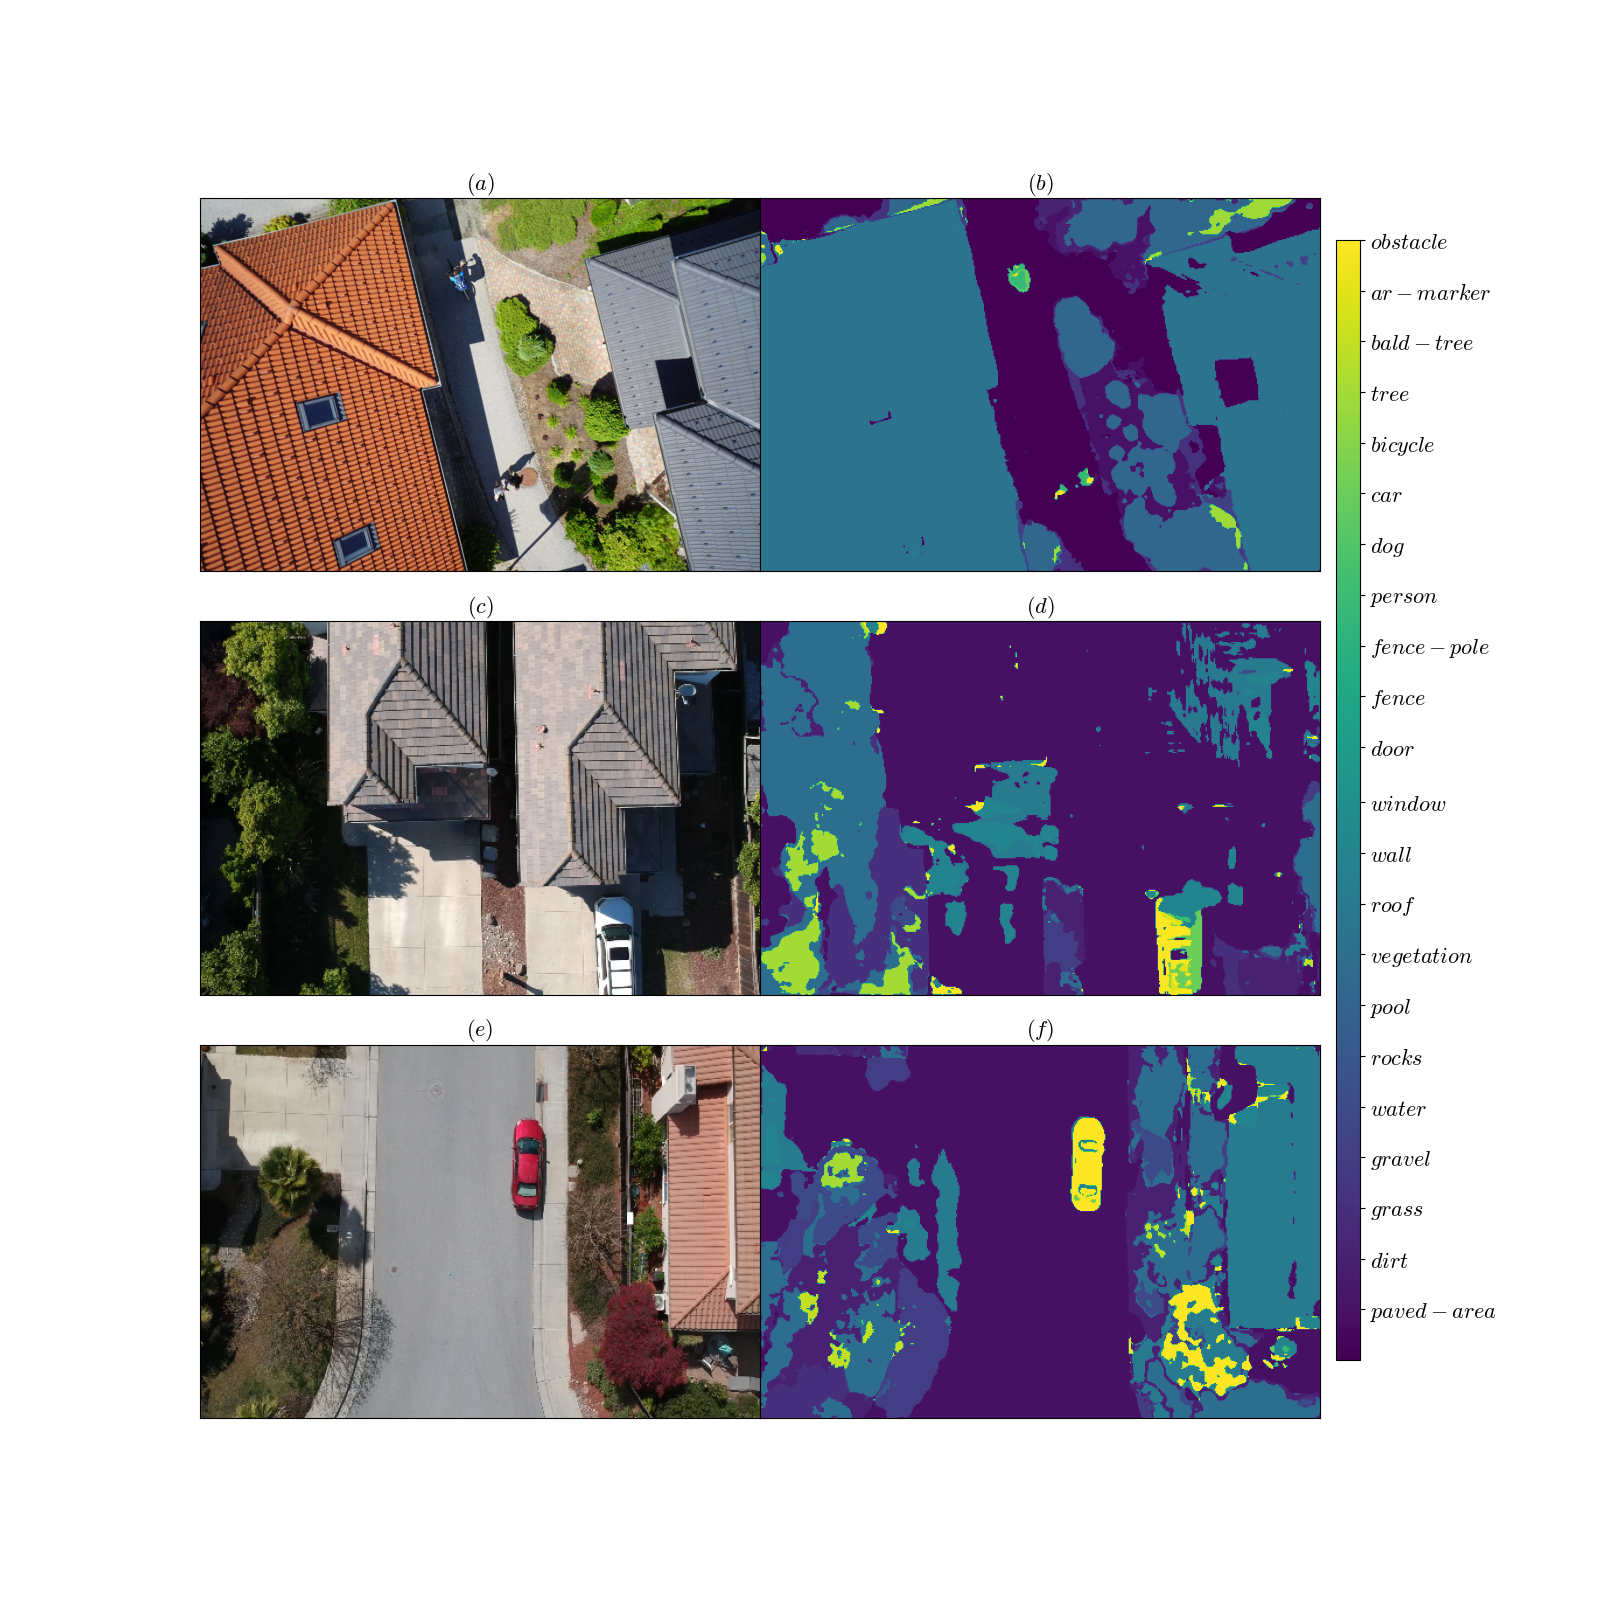

In [78]:
# Aspect ratio
asp = 1

fig, ax = plt.subplots(3, 2, figsize=(16, 16))
orig1 = ax[0,0].imshow(y)
pred1 = ax[0,1].imshow(x)
orig2 = ax[1,0].imshow(y1)
pred2 = ax[1,1].imshow(x1)
orig3 = ax[2,0].imshow(y2)
pred3 = ax[2,1].imshow(x2)

titlefont = 16
ax[0, 0].set_title("$(a)$", size=titlefont)
ax[0, 1].set_title("$(b)$", size=titlefont)
ax[1, 0].set_title("$(c)$", size=titlefont)
ax[1, 1].set_title("$(d)$", size=titlefont)
ax[2, 0].set_title("$(e)$", size=titlefont)
ax[2, 1].set_title("$(f)$", size=titlefont)

ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].axes.yaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].axes.yaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)
ax[2,0].axes.xaxis.set_visible(False)
ax[2,0].axes.yaxis.set_visible(False)
ax[2,1].axes.xaxis.set_visible(False)
ax[2,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0.1, wspace=0)
fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.835, 0.15, 0.015, 0.7])
cbar=fig.colorbar(pred, cax=cbar_ax, ticks = [int(thresh[i][1]) for i in range(0, len(thresh), 1)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), 1)])
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)

## Plot original augmented data pics

In [7]:
# Image path
path = "../data/dataset/semantic_drone_dataset/new_data/images"

# Image name
pic_path1 = "043_0.jpg"
pic_path2 = "043_1.jpg"
pic_path3 = "043_2.jpg"
pic_path4 = "043_3.jpg"

pic1 = os.path.join(path,pic_path1)
pic2 = os.path.join(path,pic_path2)
pic3 = os.path.join(path,pic_path3)
pic4 = os.path.join(path,pic_path4)

p1 = plt.imread(pic1)
p2 = plt.imread(pic2)
p3 = plt.imread(pic3)
p4 = plt.imread(pic4)

if p1 is None:
    raise Exception("p1 has not been read! Check your path name.")

if p2 is None:
    raise Exception("p2 has not been read! Check your path name.")

if p3 is None:
    raise Exception("p3 has not been read! Check your path name.")

if p4 is None:
    raise Exception("p4 has not been read! Check your path name.")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
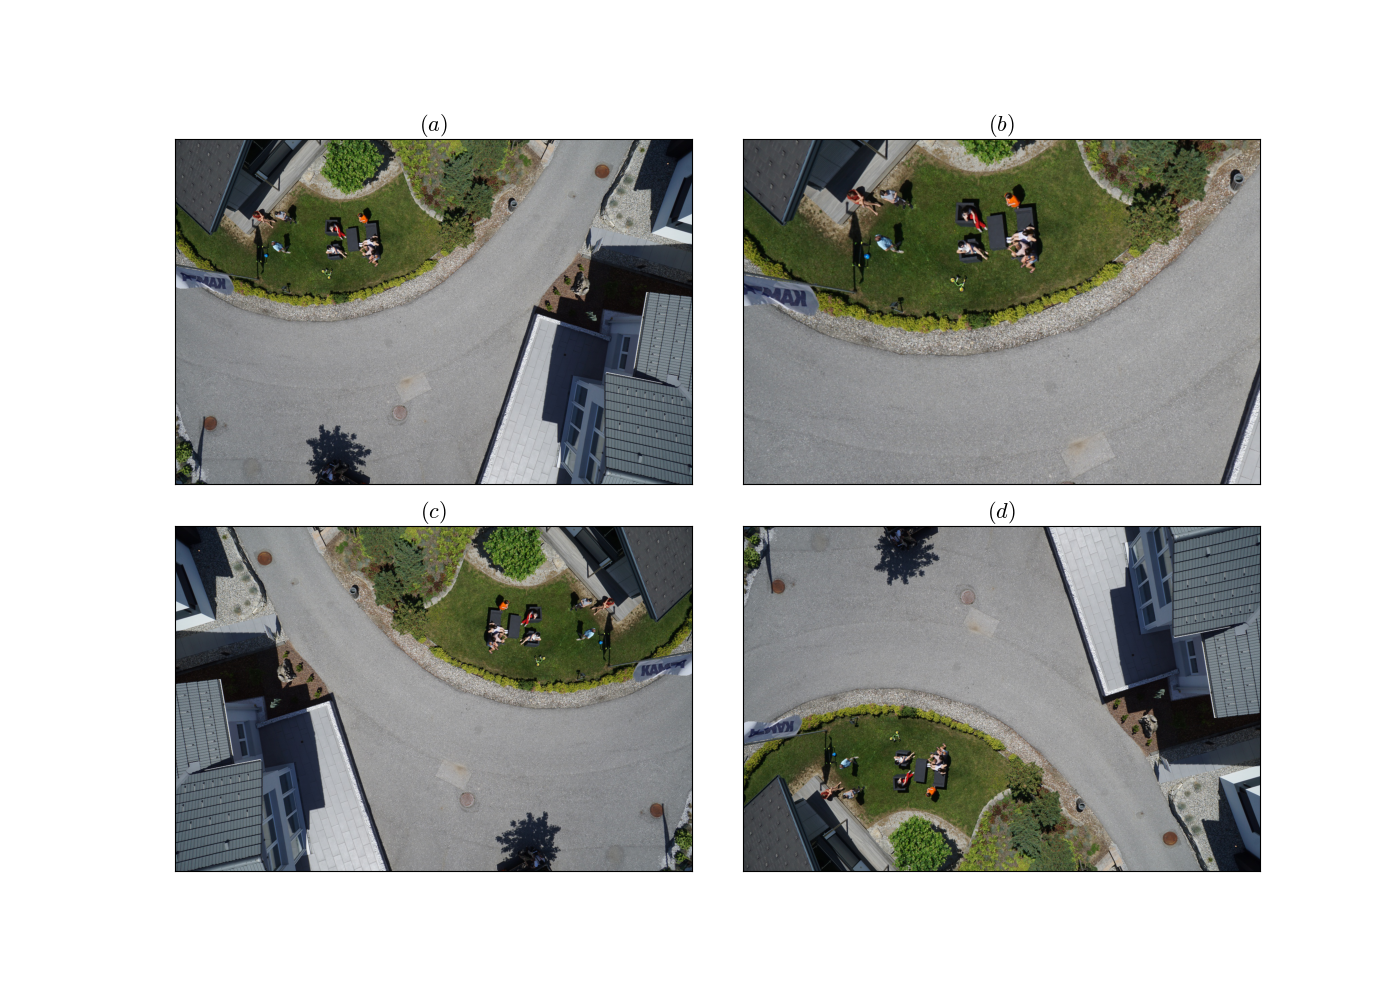

In [20]:
# Aspect ratio
asp = 1

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
orig1 = ax[0,0].imshow(p1)
pred1 = ax[0,1].imshow(p2)
orig2 = ax[1,0].imshow(p3)
pred2 = ax[1,1].imshow(p4)


titlefont = 16
ax[0, 0].set_title("$(a)$", size=titlefont)
ax[0, 1].set_title("$(b)$", size=titlefont)
ax[1, 0].set_title("$(c)$", size=titlefont)
ax[1, 1].set_title("$(d)$", size=titlefont)


ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].axes.yaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].axes.yaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0.01, wspace=0.1)

## Plot Drone Car Experiment

In [5]:
# Image path
orig_path1 = "../data/drone_vids/shade_exp/car/morning/img/orig"
pred_path1 = "../data/drone_vids/shade_exp/car/morning/img/pred"
orig_path2 = "../data/drone_vids/shade_exp/car/day/img/orig"
pred_path2 = "../data/drone_vids/shade_exp/car/day/img/pred"
orig_path3 = "../data/drone_vids/shade_exp/car/evening/img/orig"
pred_path3 = "../data/drone_vids/shade_exp/car/evening/img/pred"

# Image name
orig_name1 = "original_0.png"
pred_name1 = "0.png"
orig_name2 = "original_0.png"
pred_name2 = "0.png"
orig_name3 = "original_0.png"
pred_name3 = "0.png"

orig1 = os.path.join(orig_path1,orig_name1)
pred1 = os.path.join(pred_path1,pred_name1)
orig2 = os.path.join(orig_path2,orig_name2)
pred2 = os.path.join(pred_path2,pred_name2)
orig3 = os.path.join(orig_path3,orig_name3)
pred3 = os.path.join(pred_path3,pred_name3)

o1 = plt.imread(orig1)
p1 = cv2.imread(pred1, cv2.IMREAD_GRAYSCALE)
o2 = plt.imread(orig2)
p2 = cv2.imread(pred2, cv2.IMREAD_GRAYSCALE)
o3 = plt.imread(orig3)
p3 = cv2.imread(pred3, cv2.IMREAD_GRAYSCALE)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
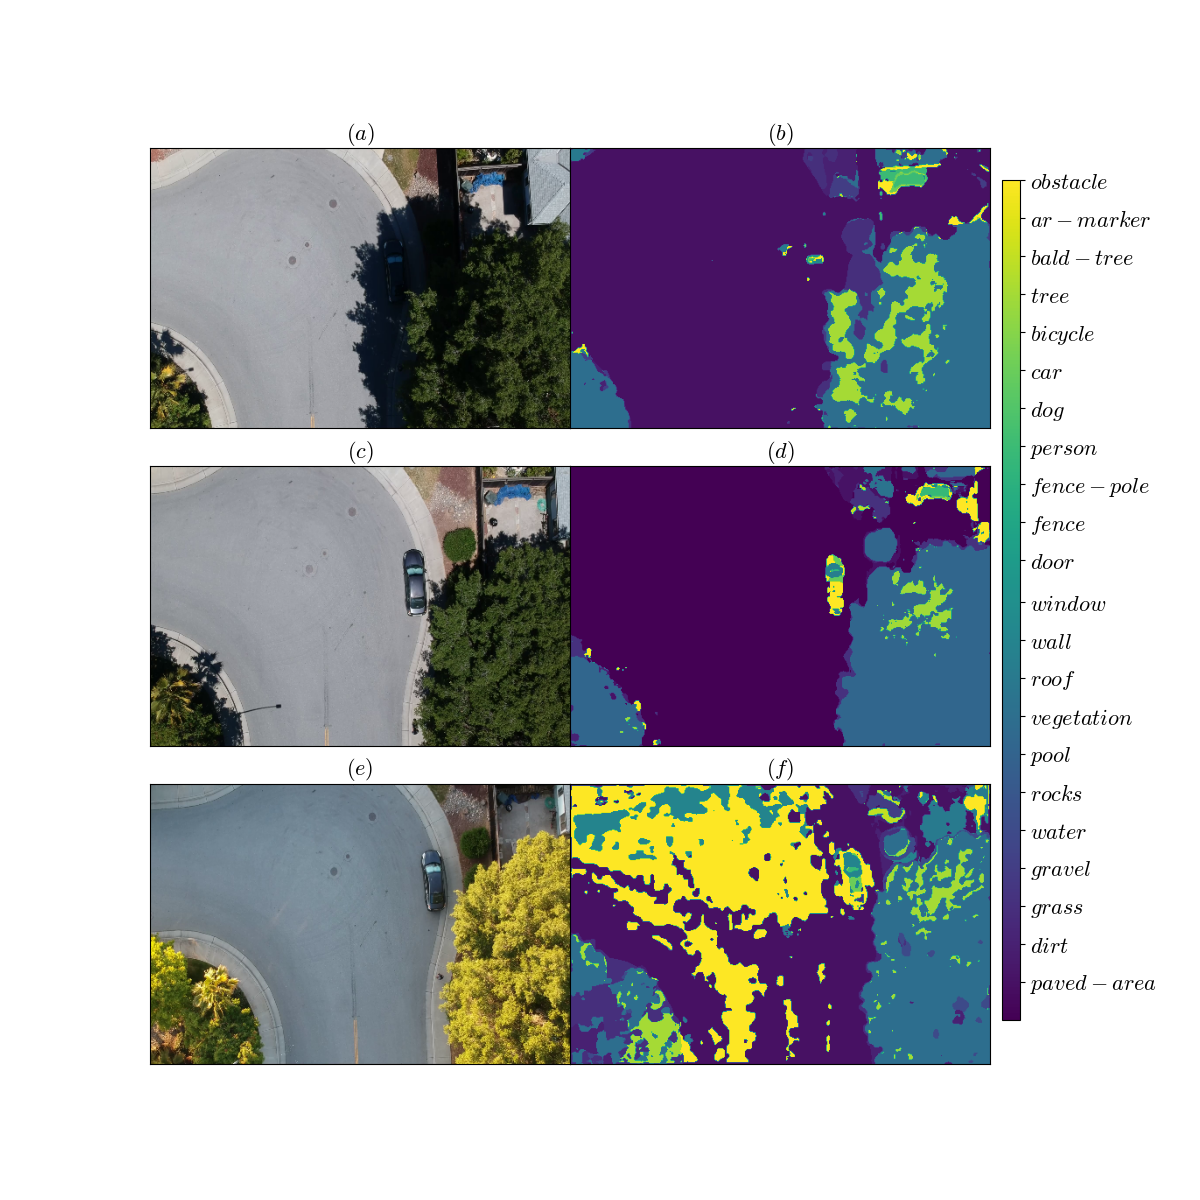

In [6]:
# Aspect ratio
asp = 1

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax[0,0].imshow(o1)
ax[0,1].imshow(p1)
ax[1,0].imshow(o2)
ax[1,1].imshow(p2)
ax[2,0].imshow(o3)
pred = ax[2,1].imshow(p3)


titlefont = 16
ax[0, 0].set_title("$(a)$", size=titlefont)
ax[0, 1].set_title("$(b)$", size=titlefont)
ax[1, 0].set_title("$(c)$", size=titlefont)
ax[1, 1].set_title("$(d)$", size=titlefont)
ax[2, 0].set_title("$(e)$", size=titlefont)
ax[2, 1].set_title("$(f)$", size=titlefont)


ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].axes.yaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].axes.yaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)
ax[2,0].axes.xaxis.set_visible(False)
ax[2,0].axes.yaxis.set_visible(False)
ax[2,1].axes.xaxis.set_visible(False)
ax[2,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0.1, wspace=0)

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.835, 0.15, 0.015, 0.7])
cbar=fig.colorbar(pred, cax=cbar_ax, ticks = [int(thresh[i][1]) for i in range(0, len(thresh), 1)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), 1)])
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)

## Plot Drone Person Experiment

In [59]:
# Image path
orig_path1 = "../data/drone_vids/shade_exp/person/no_shade/img/orig"
pred_path1 = "../data/drone_vids/shade_exp/person/no_shade/img/pred"
orig_path2 = "../data/drone_vids/shade_exp/person/shade/img/orig"
pred_path2 = "../data/drone_vids/shade_exp/person/shade/img/pred"


# Image name
orig_name1 = "original_105.png"
pred_name1 = "105.png"
orig_name2 = "original_110.png"
pred_name2 = "110.png"


orig1 = os.path.join(orig_path1,orig_name1)
pred1 = os.path.join(pred_path1,pred_name1)
orig2 = os.path.join(orig_path2,orig_name2)
pred2 = os.path.join(pred_path2,pred_name2)


o1 = plt.imread(orig1)
p1 = cv2.imread(pred1, cv2.IMREAD_GRAYSCALE)
o2 = plt.imread(orig2)
p2 = cv2.imread(pred2, cv2.IMREAD_GRAYSCALE)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
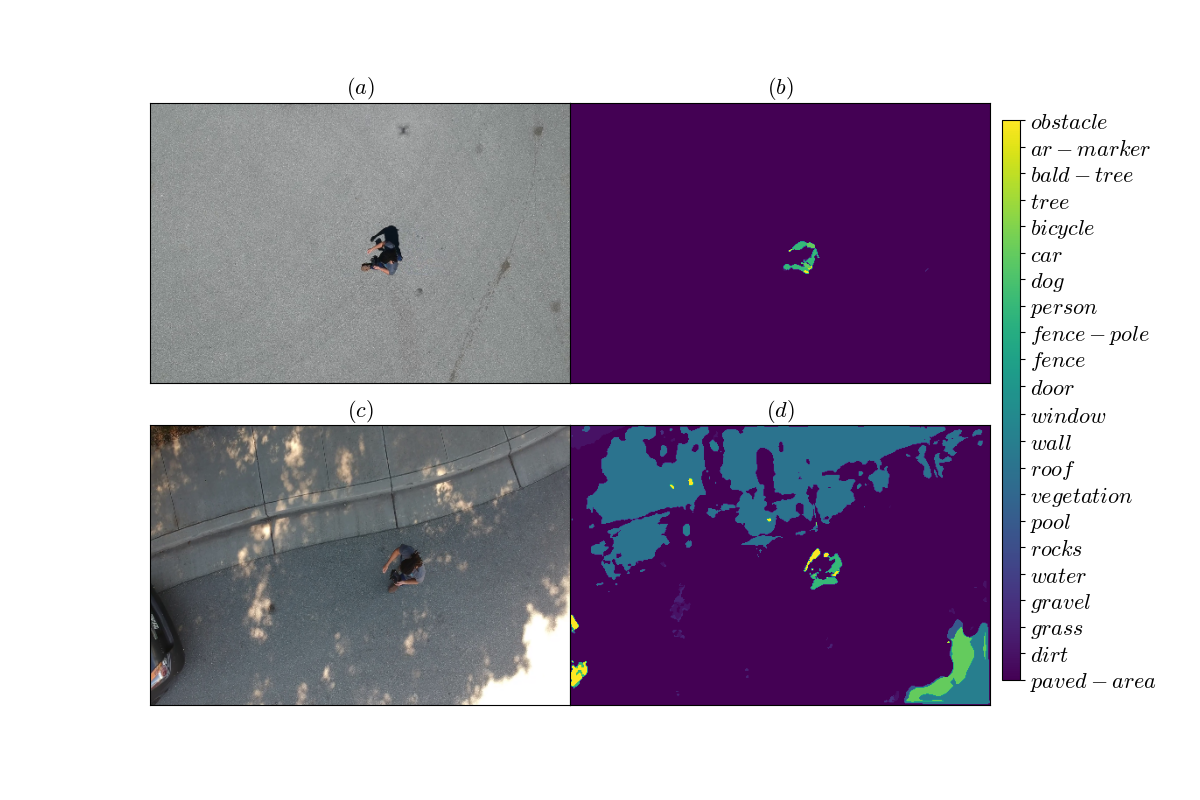

In [69]:
# Aspect ratio
asp = 1

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0,0].imshow(o1)
ax[0,1].imshow(p1)
ax[1,0].imshow(o2)
pred = ax[1,1].imshow(p2)



titlefont = 16
ax[0, 0].set_title("$(a)$", size=titlefont)
ax[0, 1].set_title("$(b)$", size=titlefont)
ax[1, 0].set_title("$(c)$", size=titlefont)
ax[1, 1].set_title("$(d)$", size=titlefont)


ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].axes.yaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].axes.yaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0.1, wspace=0)

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.835, 0.15, 0.015, 0.7])
cbar=fig.colorbar(pred, cax=cbar_ax, ticks = [int(thresh[i][1]) for i in range(0, len(thresh), 1)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), 1)])
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)

## Compare Mobile u-net and u-net

In [2]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import os
import cv2
import numpy as np

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
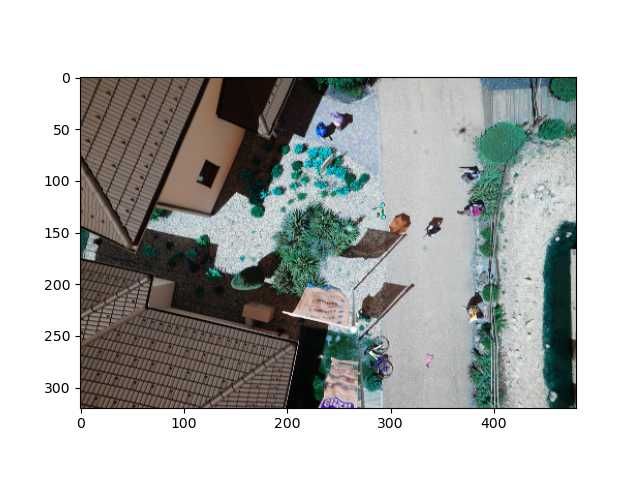

In [14]:
num = "173_0"

image_path = "../data/dataset/semantic_drone_dataset/new_data/images"
img = os.path.join(image_path, f"{num}.jpg")
H = 320
W = 480
x = cv2.imread(img, cv2.IMREAD_COLOR)
x = cv2.resize(x, (W, H))
x = x/255.0
x = x.astype(np.float32)
plt.figure()
plt.imshow(x)

In [15]:
# Load Mobile U-net
mobileunet = tf.keras.models.load_model("../results/models/model_3.h5")
m = mobileunet.predict(np.expand_dims(x, axis=0))[0]

In [16]:
m = np.argmax(m, axis=-1)
m = np.expand_dims(m, axis=-1)  
num_classes = 23
m = m * (255/num_classes)
m = m.astype(np.int32)
m = np.concatenate([m, m, m], axis=2)

In [17]:
cv2.imwrite(f"../results/mobileunet_{num}.png", m)

True

In [18]:
# Load U-net
unet = tf.keras.models.load_model("../results/models/model_11.h5")
u = unet.predict(np.expand_dims(x, axis=0))[0]

In [19]:
u = np.argmax(u, axis=-1)
u = np.expand_dims(u, axis=-1)  
num_classes = 23
u = u * (255/num_classes)
u = u.astype(np.int32)
u = np.concatenate([u, u, u], axis=2)

In [20]:
cv2.imwrite(f"../results/unet_{num}.png", u)

True

Plot these predictions

In [21]:
# Image path
mask_path = "../data/dataset/semantic_drone_dataset/new_data/masks"
mobileunet_path = "../results"
unet_path = "../results"


# Image name
mask_name = f"{num}.png"
mobileunet_name = f"mobileunet_{num}.png"
unet_name = f"unet_{num}.png"


mask_join = os.path.join(mask_path,mask_name)
mobileunet_join = os.path.join(mobileunet_path,mobileunet_name)
unet_join = os.path.join(unet_path,unet_name)


orig = plt.imread(img)
mask = cv2.imread(mask_join, cv2.IMREAD_GRAYSCALE)
munet_img = cv2.imread(mobileunet_join, cv2.IMREAD_GRAYSCALE)
unet_img = cv2.imread(unet_join, cv2.IMREAD_GRAYSCALE)

#H = 320
#W = 480

#img = cv2.resize(img, (W, H))
#mask = cv2.resize(mask, (W, H))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
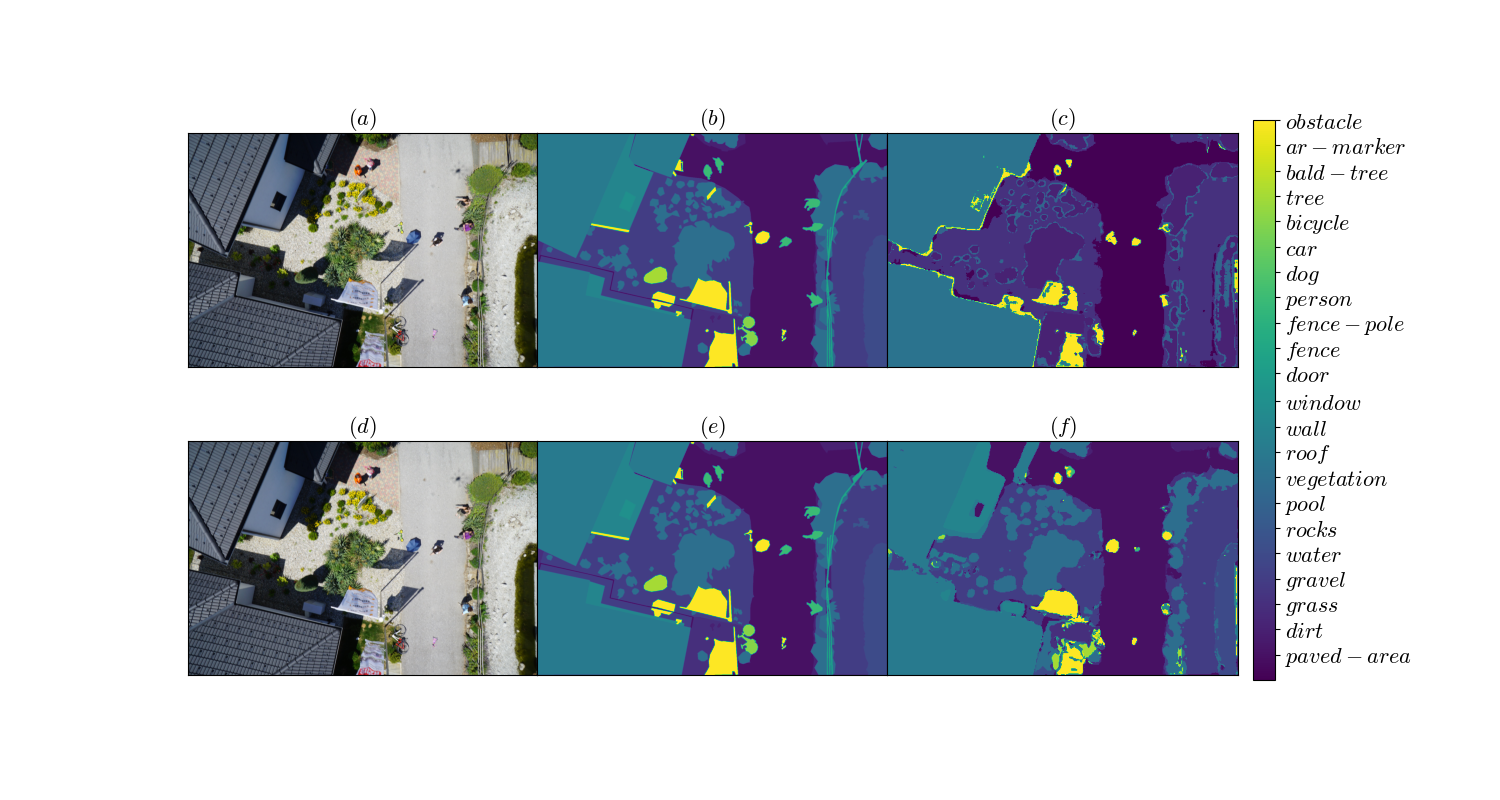

In [73]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0,0].imshow(orig)
ax[0,1].imshow(mask)
ax[0,2].imshow(munet_img)
ax[1,0].imshow(orig)
ax[1,1].imshow(mask)
pred = ax[1,2].imshow(unet_img)


titlefont = 16
ax[0, 0].set_title("$(a)$", size=titlefont)
ax[0, 1].set_title("$(b)$", size=titlefont)
ax[0, 2].set_title("$(c)$", size=titlefont)
ax[1, 0].set_title("$(d)$", size=titlefont)
ax[1, 1].set_title("$(e)$", size=titlefont)
ax[1, 2].set_title("$(f)$", size=titlefont)


ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].axes.yaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[0,2].axes.xaxis.set_visible(False)
ax[0,2].axes.yaxis.set_visible(False)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].axes.yaxis.set_visible(False)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)
ax[1,2].axes.xaxis.set_visible(False)
ax[1,2].axes.yaxis.set_visible(False)

plt.subplots_adjust(hspace=0, wspace=0)

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.835, 0.15, 0.015, 0.7])
cbar=fig.colorbar(pred, cax=cbar_ax, ticks = [int(thresh[i][1]) for i in range(0, len(thresh), 1)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), 1)])
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)